<a href="https://colab.research.google.com/github/phuonggtrann/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS16_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns # for stretch 

## 1) Load a dataset from UCI (via its URL)

- Are the headers showing up properly?
  - The headers is not showing up correctly as the original file has no header. Therefore, pandas is using first row as headers.

- Look at the first 5 and the last 5 rows, do they seem to be in order?
  - There is no order found 

- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - According to UCI page, there is 150 instances (rows) and 4 attributes (comlumns). The first trial of df1.shape return (149,4). However, when the headline is fixed, df1.shape return (150,5) which match UCI's data

- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
  - According to UCI. there is no missing value in this data set

- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# Load the data set via its URL 
first_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data"
  # df1 = pd.read_csv(first_url)

# Adding header and re-read csv 
df1_headers = ['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm', 'petal_width_in_cm', 'class']
df1 = pd.read_csv(first_url, names = df1_headers)
print(df1.shape) # Shape fit with given info on the website. CSV loaded correctly

# Look at first 5 and last 5 rows
df1.head()
df1.tail()

# Use describe() for summary statistics
df1.describe()


(150, 5)


,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2) Load a dataset from your local machine.
- Are the headers showing up properly?
  - The headers is not showing up correctly as the original file has no header. Therefore, pandas is using first row as headers.

- Look at the first 5 and the last 5 rows, do they seem to be in order?
  - There is no order found. However, in the 'sex' column, majority of them are 1 aka male (From UCI index, sex(1 = male, 0 = female)

- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - According to UCI page, there is 200 instances (rows) and 14 attributes (comlumns). When the headline is fixed, df1.shape return (200,14) which match UCI's data

- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
  - According to UCI. there is missing value. Missing values are displayed by '?' therefore df.isnull().sum() is not regconizing any missing value
  - After replace '?' with np.NaN, missing values are found

- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [29]:
from google.colab import files
uploaded = files.upload()

Saving processed.va (1).data to processed.va (1).data


In [38]:
df2_headers = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df2 = pd.read_csv('processed.data', names = df2_headers)

print(df2.shape)

# Replace ? to nan
df2 = df2.replace({'?' : np.NaN})
df2.isnull().sum() # successful indicating missing value

# using describe()
df2.describe()

(200, 14)


,age,sex,cp,restecg,num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [42]:
pd.crosstab(df2['sex'], df2['age'])

age,35,37,38,40,41,42,43,44,45,46,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,76,77
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,2,2,1,1,1,1,2,4,2,2,6,2,5,5,14,9,10,12,8,12,11,15,14,8,6,3,5,4,8,1,2,3,5,3,1,1


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

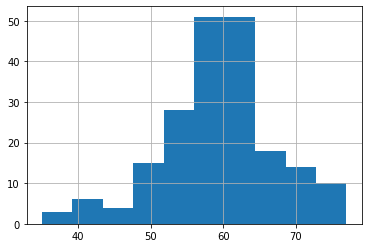

In [44]:
# Histogram
df2['age'].hist()


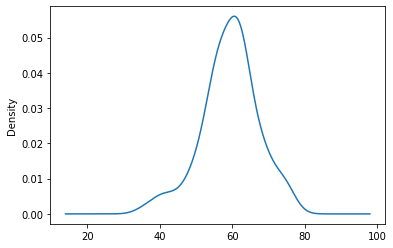

In [45]:
# Density Plots
df2['age'].plot.density()

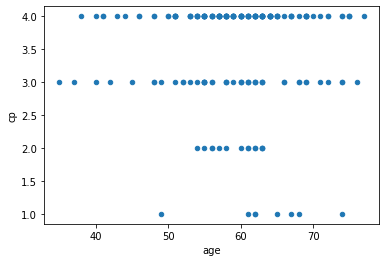

In [58]:
# Scatter Plots
df2.head()
df2.plot.scatter('age', 'cp') 
# cp = chest pain type


## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


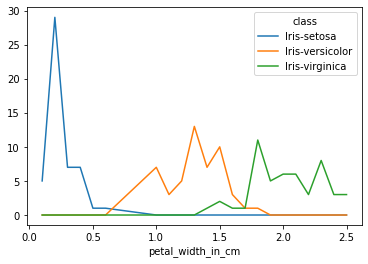

In [54]:
pd.crosstab(df1['petal_width_in_cm'], df1['class']).plot();

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

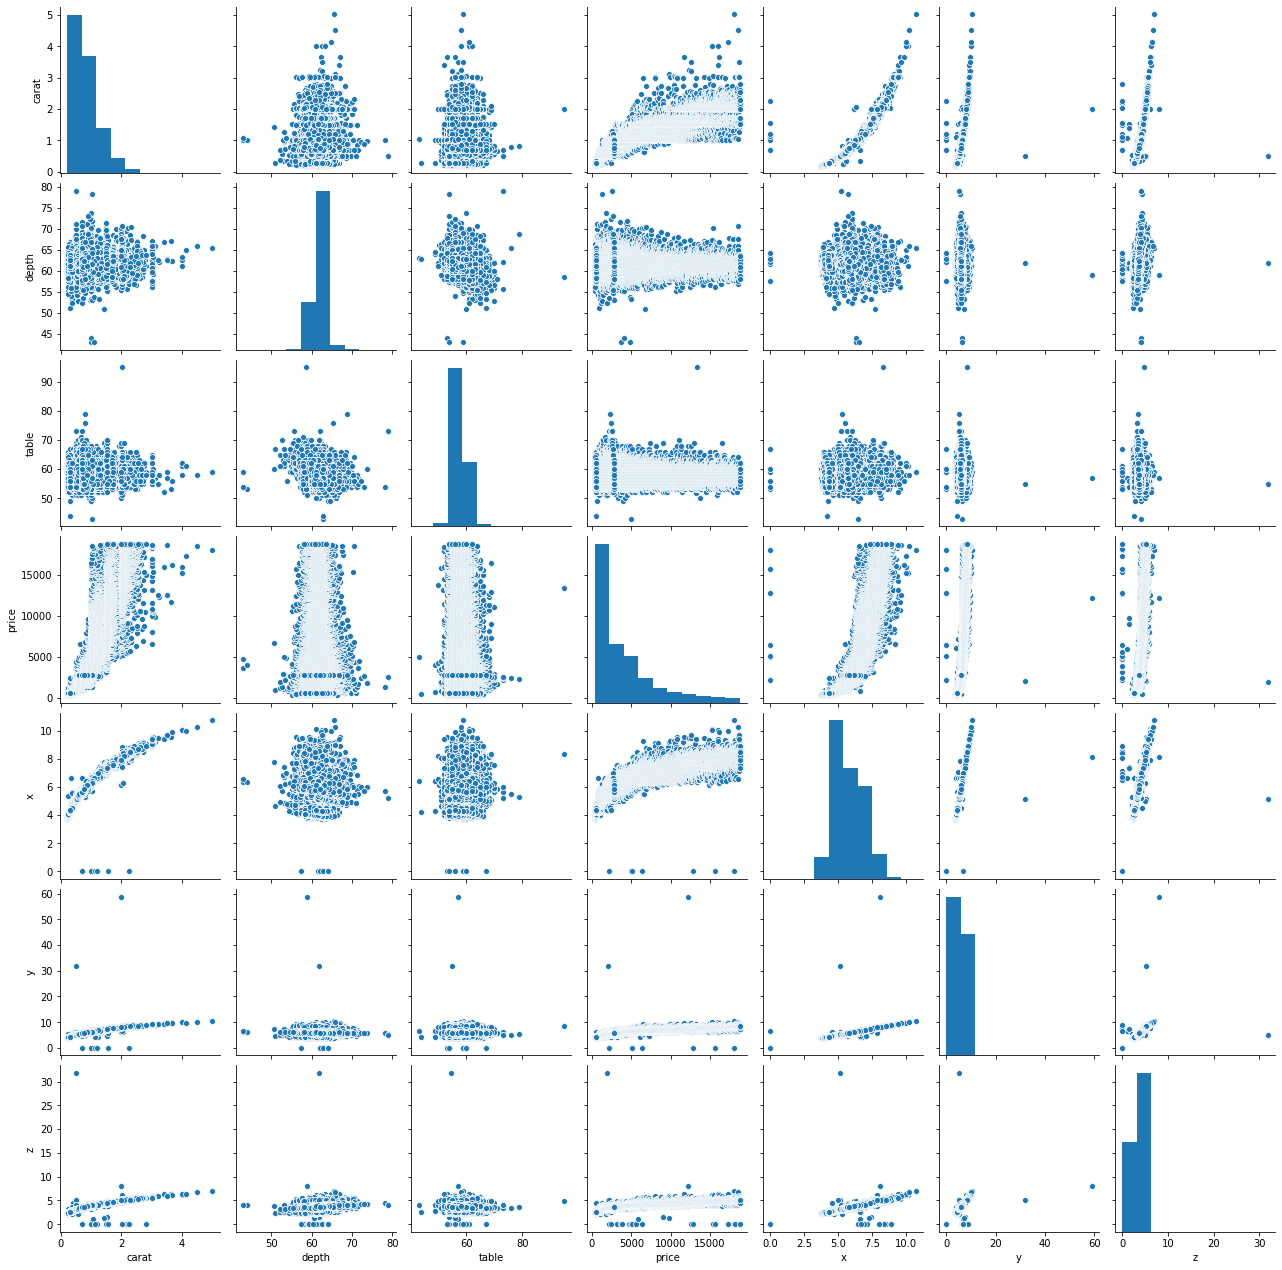

In [70]:
# using seaborn pairplot
diamond = sns.load_dataset("diamonds")
d = sns.pairplot(diamond)

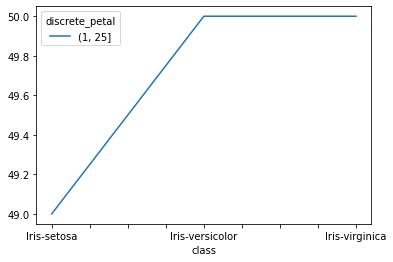

In [105]:
# using pd.cut 
df1['discrete_petal'] = (pd.cut(df1['petal_length_in_cm'], [1,25,50,100]))

# visualize
pd.crosstab(df1['class'],df1['discrete_petal']).plot();

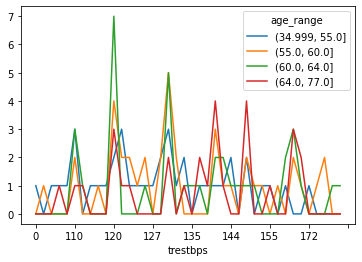

In [109]:
# using pd.qcut
df2['age_range'] = (pd.qcut(df2['age'],4))

# visualize
pd.crosstab(df2['trestbps'],df2['age_range']).plot();

In [99]:
import requests
import json
import image
response = requests.get("https://api.exchangeratesapi.io/latest?symbols=USD,GBP")
data = response.text # read data
data_parse = json.loads(data) # load data
print(json.dumps(data_parse, indent=2))
# data loaded

{
  "rates": {
    "USD": 1.0942,
    "GBP": 0.87898
  },
  "base": "EUR",
  "date": "2020-05-04"
}
